**Demo Decisiontree trên tập đữ liệu Pima Indians Diabetes Database (Cơ sở dữ liệu về bệnh tiểu đường của người da đỏ Pima)**

21521109

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

Load dữ liệu và xem cấu trúc dữ liệu từ dataset

In [59]:
data = pd.read_csv("diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Xem tỷ lệ người bị tiểu đường và người không bị trong dataset

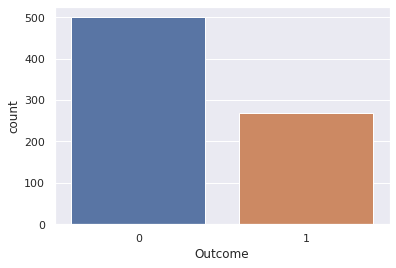

In [60]:
ax = sns.countplot(x = "Outcome", data=data)

Sử dụng bản đồ nhiệt để phân tích dữ liệu rõ ràng hơn

[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

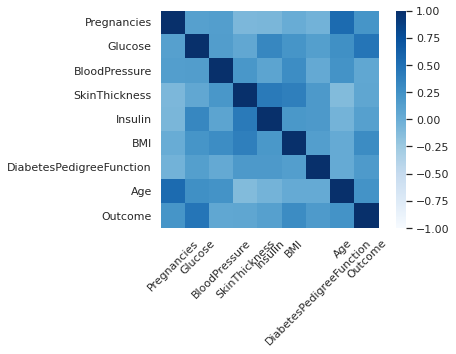

In [61]:
ax = sns.heatmap(data.corr(), vmin = -1, vmax =  1, center =  0, cmap = "Blues", square = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Chia dữ liệu thành các input và out put, sau đó chia thành 2 phần bao gồm: 80% dữ liệu dùng để train và 20% dữ liệu dùng để test

In [62]:
Y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [63]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size= 0.2)

Dựng cây và tiến hành fit model (Để các tham số là mặc định)

In [64]:
from sklearn import tree

DT_model =  tree.DecisionTreeClassifier()
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier()

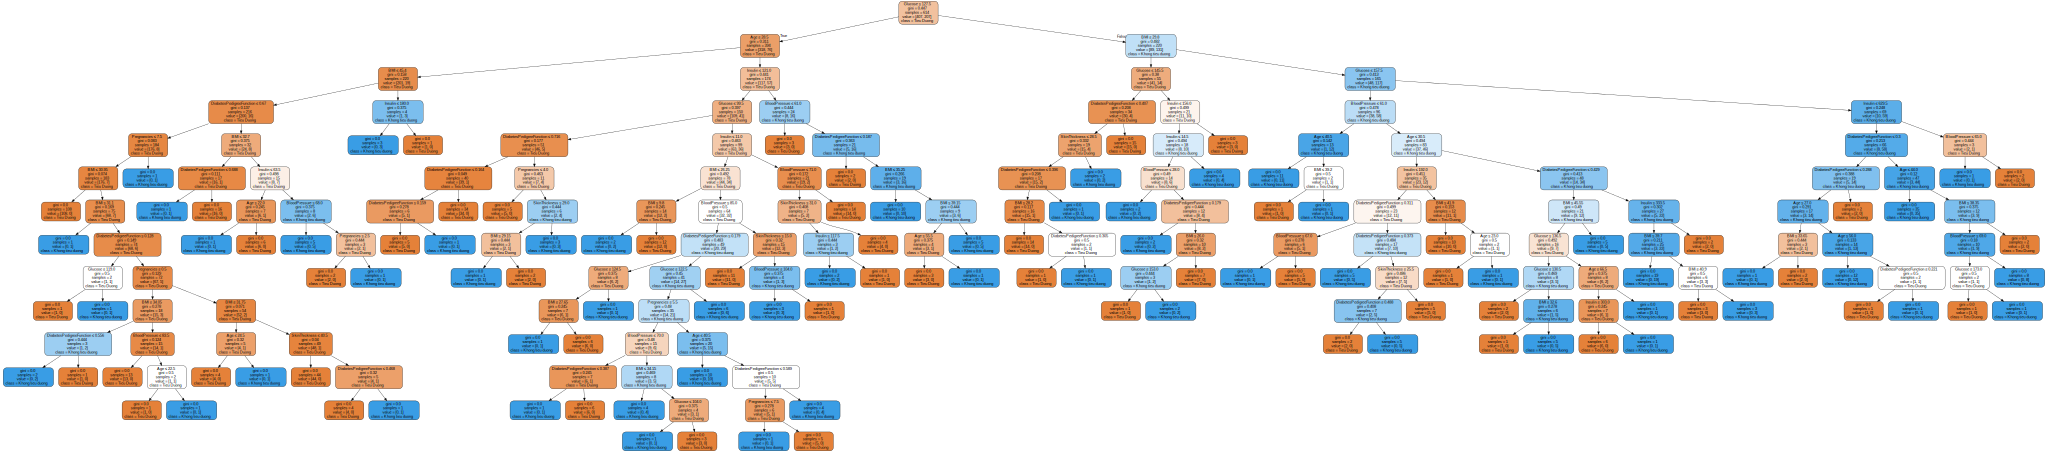

In [65]:
import graphviz
fig_Graphviz =  tree.export_graphviz(DT_model,out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Tieu Duong','Khong tieu duong'],
                                filled=True,
                                rounded = True,
                                special_characters=True)

graph = graphviz.Source(fig_Graphviz, format = "png")
graph

In [66]:
from sklearn import metrics
y_test_pre = DT_model.predict(X_test)
y_train_pre = DT_model.predict(X_train)
print(DT_model.get_depth())
print(metrics.accuracy_score(Y_train, y_train_pre))
print(metrics.accuracy_score(Y_test, y_test_pre))

13
1.0
0.7207792207792207


Cây hoạt động rất tốt trên tập train tuy nhiên ở trên tập test ta chỉ đạt được accuracy là 0.72 có vẻ chúng ta đã bị overfitting ở đây, hãy thử khắc phục bằng cách thay đổi một số tham số cho cây (dưới đây là thay đổi tham số max_depth)

In [68]:

DT_model =  tree.DecisionTreeClassifier(max_depth=5)
DT_model.fit(X_train,Y_train)

y_test_pre = DT_model.predict(X_test)
print(metrics.accuracy_score(Y_test, y_test_pre))

0.7727272727272727


Sau khi thử nghiệm rất nhiều chúng ta tìm ra được với max_depth = 5 thì đạt được độ chính xác cao nhất trên tập test.

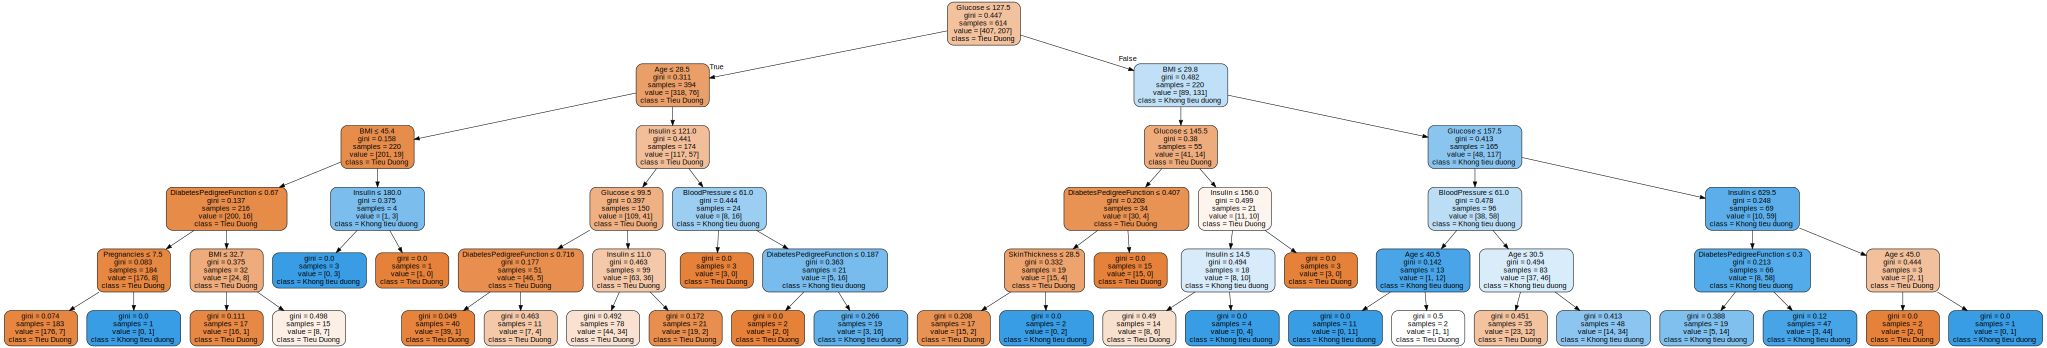

In [69]:
import graphviz
fig_Graphviz =  tree.export_graphviz(DT_model,out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Tieu Duong','Khong tieu duong'],
                                filled=True,
                                rounded = True,
                                special_characters=True)

graph = graphviz.Source(fig_Graphviz, format = "png")
graph

In [70]:
graph.render('Diabetes')

'Diabetes.png'

Tiếp theo chúng ta thay đổi tham số thứ hai là criterion (là các tiêu chuẩn chia như GINI, entrophy), mặc định của sklearn chính là GINI

In [71]:

DT_model =  tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
DT_model.fit(X_train,Y_train)

y_test_pre = DT_model.predict(X_test)
print(metrics.accuracy_score(Y_test, y_test_pre))

0.8181818181818182


Trong trường hợp này tiêu chuẩn chia entrophy có vẻ tốt hơn tiêu chuẩn chia của GINI

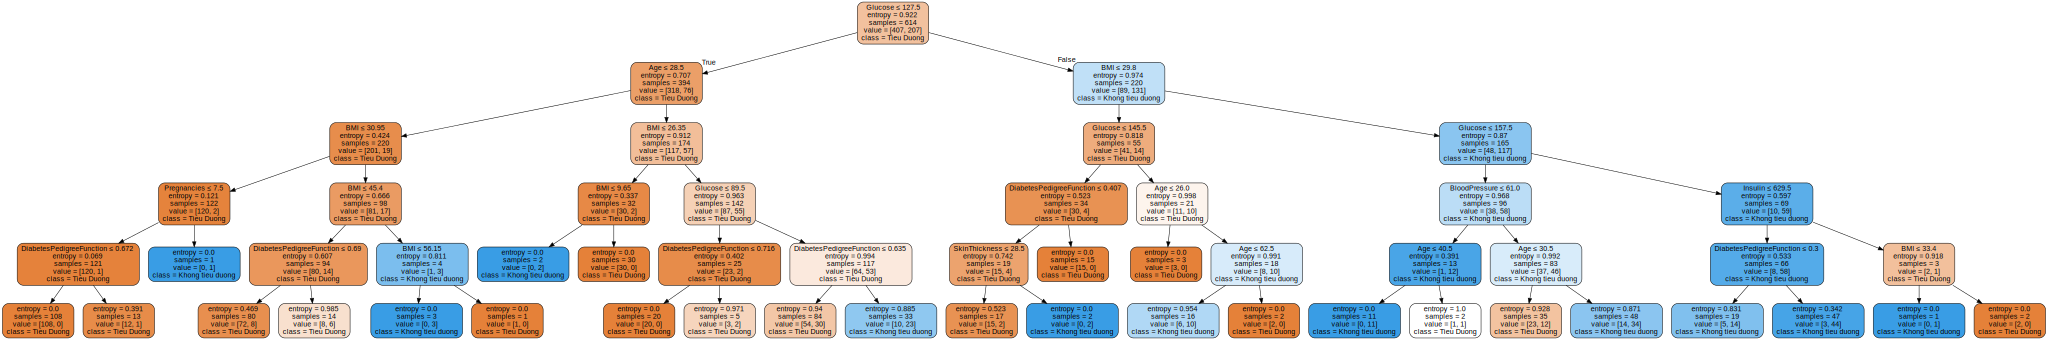

In [72]:
import graphviz
fig_Graphviz =  tree.export_graphviz(DT_model,out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Tieu Duong','Khong tieu duong'],
                                filled=True,
                                rounded = True,
                                special_characters=True)

graph = graphviz.Source(fig_Graphviz, format = "png")
graph

# **(Tùy chọn bổ sung)**
Một số cách tối ưu decisiontree nhằm khắc phục các nhược điểm của nó.

Random forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [81]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=10)
RF_model.fit(X_train,Y_train)

y_test_pre = RF_model.predict(X_test)
print(metrics.accuracy_score(Y_test, y_test_pre))

0.7857142857142857


In [115]:
import xgboost as xgb
train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 2} 
epochs = 50

In [116]:
XB_model = xgb.train(param, train, epochs)
y_test_pre = XB_model.predict(test)
print(metrics.accuracy_score(Y_test,y_test_pre))

0.7597402597402597


Mặc dù độ chính xác trên tập test thấp hơn so với  decisiontree ở trên. Tuy nhiên, trong đa số trường hợp hai thuật toán trên  nhìn chung đều cho ra kết quả tốt hơn so với decision tree thông thường.